In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
txn = pd.read_csv('DACC_Hackathon_TransactionData.csv')
demog = pd.read_excel('DACC_Hackathon_Panelists_Demogs.xlsx')
survey_data = pd.read_excel('DACC_Hackathon_Media_Habit_Survey.xlsx', 'Raw Responses')
clusters = pd.read_excel('cluster.xlsx')

In [ ]:
len(clusters)

3916

In [ ]:
len(survey_data)

1891

In [ ]:
len(txn['Panel ID'].unique())

3917

Discrepancy between number of IDs in 'survey_data' vs 'clusters'.

Based on number of unique IDs in 'txn', likely cause for this is that some of them purchased items i.e. has transactions but did not do the survey.



In [ ]:
clusters.head()


Clusters         ID
0         2  101011101
1         2  101016101
2         0  101019101
3         2  101024101
4         0  105009103

In [ ]:
survey_data.head()

ID  v_16  v_17  v_18  v_19  ...  v_309  v_310  v_311  v_312  v_333
0  426187101     1   3.0   4.0   1.0  ...      0      0      0    NaN    1.0
1  203116101     1   3.0   3.0   1.0  ...      0      1      0    NaN    0.0
2  248111101     1   7.0   7.0   1.0  ...      0      1      0    NaN    0.0
3  201019101     1   7.0   7.0   4.0  ...      0      1      0    NaN    0.0
4  246226102     3   3.0   3.0   1.0  ...      0      1      0    NaN    0.0

[5 rows x 261 columns]

In [ ]:
# Merge survey_data and clusters into one df
df = pd.merge(survey_data, clusters, on = "ID", how = "left")

In [ ]:
df['Clusters'].unique()
df[df['Clusters'].isna()]

ID  v_16  v_17  v_18  v_19  ...  v_310  v_311  v_312  v_333  Clusters
195   802013601     1   6.0   5.0   1.0  ...      0      0    NaN    NaN       NaN
1004  802025701     7   NaN   NaN   NaN  ...      1      0    NaN    0.0       NaN
1097  801989501     4   3.0  12.0   1.0  ...      1      0    NaN    0.0       NaN
1141  802015801     1  10.0  10.0   4.0  ...      0      0    NaN    1.0       NaN
1480  801952201     1   8.0   8.0   1.0  ...      0      0    NaN    0.0       NaN
1511  802003901     1   7.0   7.0   1.0  ...      1      0    NaN    0.0       NaN
1519  801996101     1   6.0   3.0   4.0  ...      1      0    NaN    NaN       NaN
1591  802023401     3   5.0   7.0   1.0  ...      0      0    NaN    NaN       NaN
1648  801990401     3   3.0   5.0   4.0  ...      0      0    NaN    0.0       NaN
1747  802031201     1   6.0  10.0   2.0  ...      1      0    NaN    0.0       NaN
1846  802086901     1   7.0   4.0   1.0  ...      0      0    NaN    1.0       NaN
1862  802172601     1   7.0  10.0   4.0  ...      1      0    NaN    0.0       NaN
1868  802164201     7   NaN   NaN   NaN  ...      1      0    NaN    0.0       NaN

[13 rows x 262 columns]

After merging, there are some NaNs in df.
Seems like there are some who did the survey but was omitted from a cluster.

In [ ]:
# Remove the NaNs
df = df[df['Clusters'].notna()]
# Change to int type
df['Clusters'] = df['Clusters'].astype(int)

### Q2I: What device do you usually use to access the Internet?

In [ ]:
int_access = df[['ID', 'Clusters', 'v_143']]
# Remove Empty Rows
int_access = int_access.dropna()
# Get int
int_access['v_143'] = int_access['v_143'].astype(int)
# Group by cluster
#clst_grps = int_access.groupby('Clusters')

In [ ]:
#int_access['v_143'].hist(by=df['Clusters'], sharey = True, sharex = True, figsize = (15,15))

In [ ]:
int_access.Clusters.value_counts()

0    592
2    499
4    317
3    193
1    188
Name: Clusters, dtype: int64

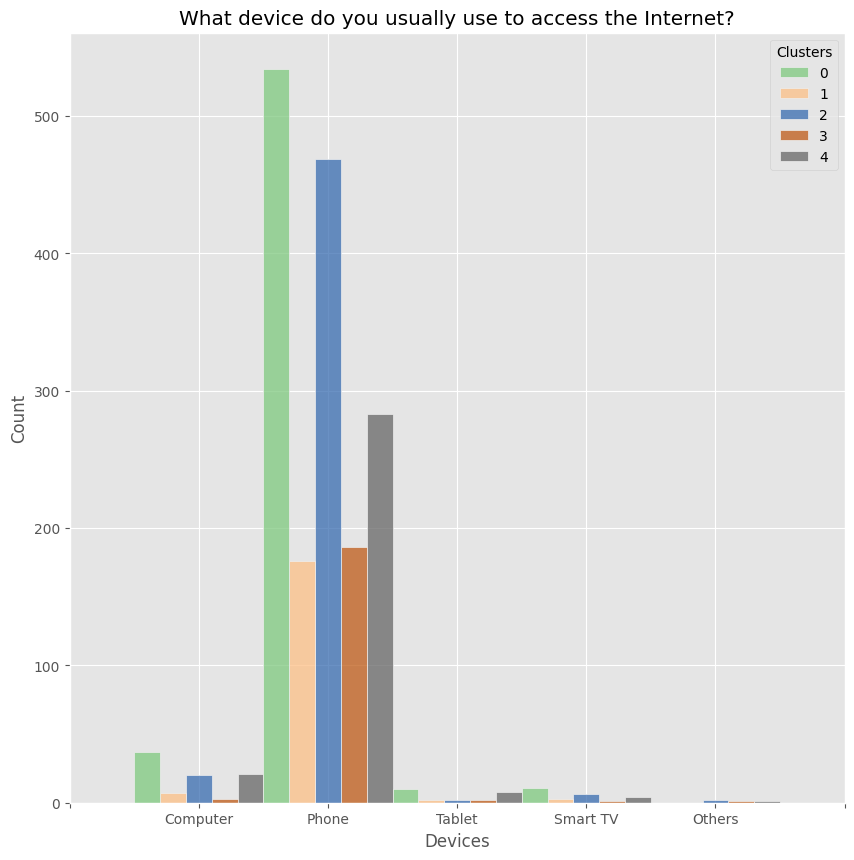

In [ ]:
fig, ax = plt.subplots(figsize = (10, 10))

sns.histplot(int_access, x = 'v_143', hue = 'Clusters', multiple = 'dodge', discrete = True, palette=plt.cm.Accent)
ax.set_title('What device do you usually use to access the Internet?')
ax.set_xlabel('Devices')

labels = ['' , 'Computer', 'Phone', 'Tablet', 'Smart TV', 'Others']
x = np.arange(len(labels)+1)
ax.set_xticks(x)
ax.set_xticklabels(x = x, labels=labels)

#import matplotlib.ticker as mticker
#ax.xaxis.set_major_locator(mticker.MaxNLocator(nbins = 'auto'))

plt.show()

Across all clusters, majority use their phones to access Internet.

Cluster 0 also has some prominent users of Computer.

### Q2k: How often do you usually visit these specific websites/apps?

Look into: IG, FB, YT, Twitter

In [ ]:
socmed_freq = df[['ID', 'Clusters', 'v_161', 'v_165', 'v_179', 'v_183']]
# Remove Empty Rows
socmed_freq = socmed_freq.dropna()

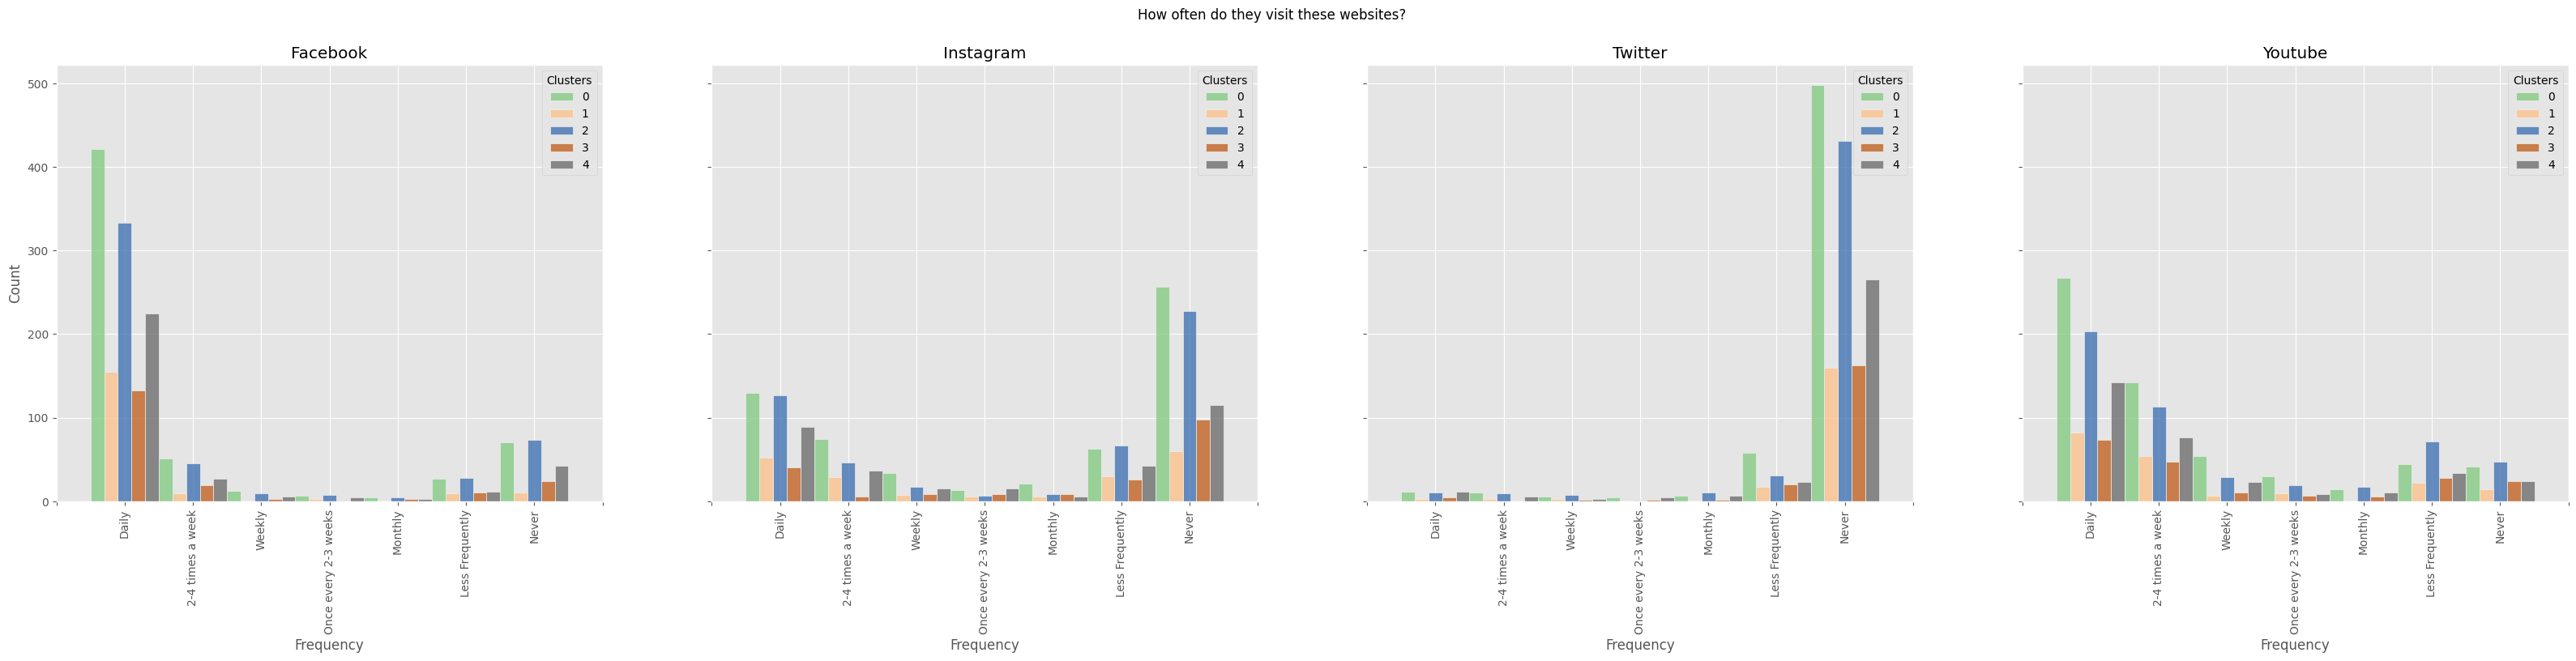

In [ ]:
fig, ax = plt.subplots(1, 4, figsize = (40, 7), sharey = True)
fig.suptitle('How often do they visit these websites?')

sns.histplot(ax = ax[0], data = socmed_freq, x = 'v_161', hue = 'Clusters', multiple = 'dodge', discrete = True, palette=plt.cm.Accent)
ax[0].set_title('Facebook')
ax[0].set_xlabel('Frequency')

sns.histplot(ax = ax[1], data = socmed_freq, x = 'v_165', hue = 'Clusters', multiple = 'dodge', discrete = True, palette=plt.cm.Accent)
ax[1].set_title('Instagram')
ax[1].set_xlabel('Frequency')

sns.histplot(ax = ax[2], data = socmed_freq, x = 'v_179', hue = 'Clusters', multiple = 'dodge', discrete = True, palette=plt.cm.Accent)
ax[2].set_title('Twitter')
ax[2].set_xlabel('Frequency')

sns.histplot(ax = ax[3], data = socmed_freq, x = 'v_183', hue = 'Clusters', multiple = 'dodge', discrete = True, palette=plt.cm.Accent)
ax[3].set_title('Youtube')
ax[3].set_xlabel('Frequency')

labels = ['', 'Daily', '2-4 times a week', 'Weekly', 'Once every 2-3 weeks', 'Monthly', 'Less Frequently', 'Never']
x = np.arange(len(labels)+1)
for i in range(4):
  ax[i].set_xticks(x)
  ax[i].set_xticklabels(x = x, labels = labels, rotation = 90)


#import matplotlib.ticker as mticker
#ax.xaxis.set_major_locator(mticker.MaxNLocator(nbins = 'auto'))

plt.show()

On Survery Engineering Excel:

In [ ]:
ls

'Broad Categories.uu'
'Categories Subsitutes.xlsx'
 cluster.xlsx
 DACC_Hackathon_Categories_Information_V2.csv
 DACC_Hackathon_Categories_Information.xlsx
 DACC_Hackathon_Media_Habit_Survey.xlsx
 DACC_Hackathon_Panelists_Demogs.xlsx
 DACC_Hackathon_TransactionData2.csv
 DACC_Hackathon_TransactionData.csv
'Survey Feature Engineering.xlsx'


In [ ]:
media=pd.read_excel("Survey Feature Engineering.xlsx")
media["ID"]= media["ID"].astype(int)
media=media.fillna(0)
media.isna().sum()
media.columns=["ID", "Frequency of Watching TV", "hoursTV",	"Frequency of Reading Newspaper",	"Content Read",	"Uses eWallet",	"Uses Touch'N Go",	"mobileData",	"Internet Access at Home",	"Frequency of Internet Access", "Frequency of Listening Radio",	"Listen to radio at Weekday Morning",	"Phone or no"]

In [ ]:
media

ID  ...  Phone or no
0     101011101  ...          1.0
1     105017101  ...          1.0
2     105021106  ...          1.0
3     105044101  ...          1.0
4     105046101  ...          1.0
...         ...  ...          ...
1886  802188101  ...          1.0
1887  802188801  ...          1.0
1888  802188901  ...          1.0
1889  802189701  ...          1.0
1890  802220001  ...          1.0

[1891 rows x 13 columns]

In [ ]:
mediacluster=pd.merge(media, clusters, 'left', on='ID')
mediacluster=mediacluster.drop(["Content Read","hoursTV"], axis=1) #Drop the timings as different media types commands different amounts of attention 

In [ ]:
mediacluster.columns

Index(['ID', 'Frequency of Watching TV', 'Frequency of Reading Newspaper',
       'Uses eWallet', 'Uses Touch'N Go', 'mobileData',
       'Internet Access at Home', 'Frequency of Internet Access',
       'Frequency of Listening Radio', 'Listen to radio at Weekday Morning',
       'Phone or no', 'Clusters'],
      dtype='object')

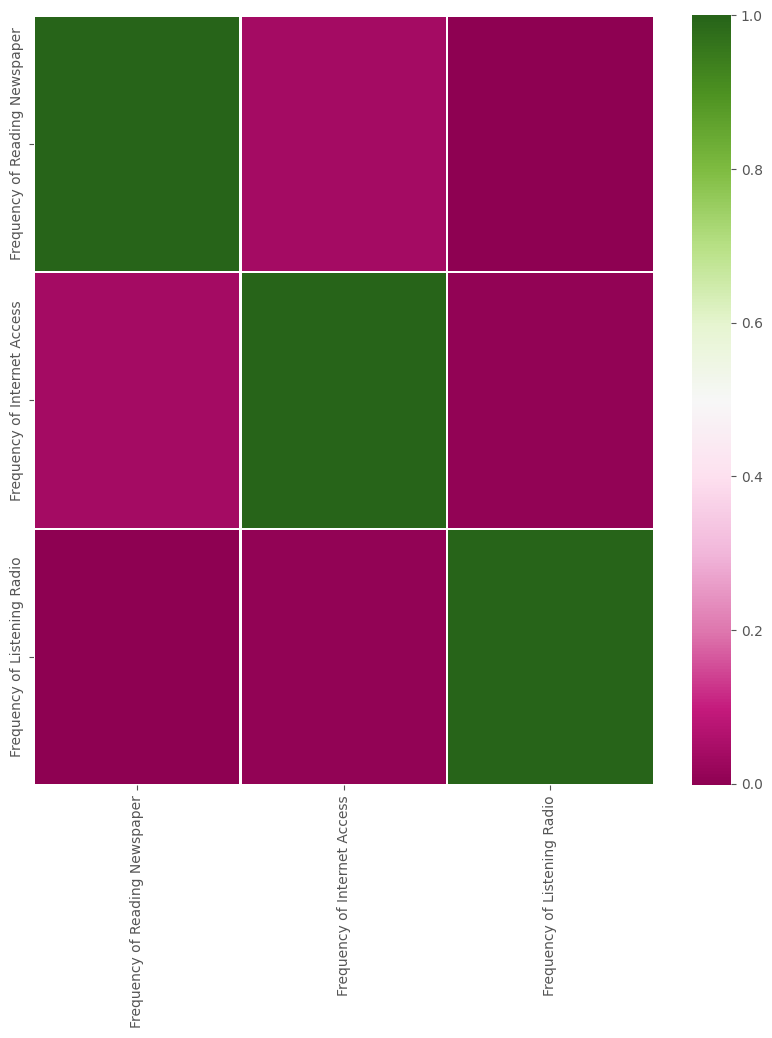

In [ ]:
catvar=["Uses eWallet", "Uses Touch'N Go", "mobileData", "Internet Access at Home", "Phone or no", "Listen to radio at Weekday Morning"]
#Binary
contvar=["Frequency of Watching TV", "Frequency of Reading Newspaper", "Frequency of Internet Access", "Frequency of Listening Radio"]
#continuous

cont_corr=mediacluster[contvar].iloc[:,1:].corr()
plt.figure(figsize=(10,10));
sns.heatmap(cont_corr, 
            xticklabels = cont_corr.columns, 
            yticklabels = cont_corr.columns, 
            cmap="PiYG", 
            linewidth = 1);


In [ ]:
from scipy.stats import pointbiserialr
from scipy.stats import pearsonr
from scipy.stats import chi2_contingency
# Point Biserial Correlation between categorical and continuous variables 
for cat_var in catvar:
  for cont_var in  contvar:
    data_cat = mediacluster[cat_var].to_numpy()
    data_cont = mediacluster[cont_var].to_numpy()
    
    corr, p_val = pointbiserialr(x=data_cat, y=data_cont)
    if np.abs(corr) >= 0.4:
      print(f'Categorical variable: {cat_var}, Continuous variable: {cont_var}, correlation: {corr}')

Categorical variable: mobileData, Continuous variable: Frequency of Internet Access, correlation: -0.4866948605908309


In [ ]:
# Find Cramer's V correlation
total_len = len(catvar)
for idx1 in range(total_len-1):
  for idx2 in range(idx1+1, total_len):
    cat_var1 = catvar[idx1]
    cat_var2 = catvar[idx2]    
    c_matrix = pd.crosstab(mediacluster[cat_var1], mediacluster[cat_var2])

    """ calculate Cramers V statistic for categorial-categorial association.
        uses correction from Bergsma and Wicher, 
        Journal of the Korean Statistical Society 42 (2013): 323-328
    """
    chi2 = chi2_contingency(c_matrix)[0]
    n = c_matrix.sum().sum()
    phi2 = chi2/n
    r,k = c_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    corr = np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))
    if corr >= 0.4:
      print(f'categorical variable 1 {cat_var1}, categorical variable 2: {cat_var2}, correlation: {corr}')

categorical variable 1 Uses eWallet, categorical variable 2: Uses Touch'N Go, correlation: 0.6253462414075185


**Collinearitybetween values** 
MobileData and Frequency of Internet Access has some correlation between them * (See the cluster plots)

eWallet and Touch 'N Go also have correlation between them

In [ ]:
mediacluster.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1891 entries, 0 to 1890
Data columns (total 12 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   ID                                  1891 non-null   int64  
 1   Frequency of Watching TV            1891 non-null   int64  
 2   Frequency of Reading Newspaper      1891 non-null   int64  
 3   Uses eWallet                        1891 non-null   int64  
 4   Uses Touch'N Go                     1891 non-null   int64  
 5   mobileData                          1891 non-null   int64  
 6   Internet Access at Home             1891 non-null   int64  
 7   Frequency of Internet Access        1891 non-null   int64  
 8   Frequency of Listening Radio        1891 non-null   int64  
 9   Listen to radio at Weekday Morning  1891 non-null   int64  
 10  Phone or no                         1891 non-null   float64
 11  Clusters                            1878 no

In [ ]:
touchngo= mediacluster.groupby(["Clusters"]).mean()["Uses Touch'N Go"]
# Proportion of ppl who use touch and go in each cluster
ewallet= mediacluster.groupby(["Clusters"]).mean()["Uses eWallet"]

In [ ]:
#ewallet.keys()


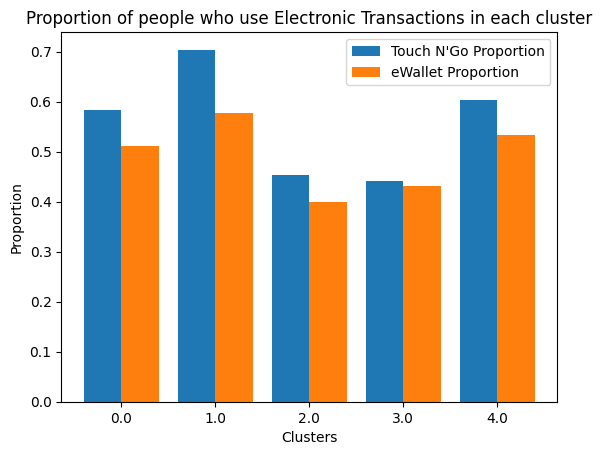

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)


X = touchngo.keys()
touchngoy=touchngo.values
ewallety=ewallet.values
  
X_axis = np.arange(5)
  
plt.bar(X_axis - 0.2, touchngoy, 0.4, label = "Touch N'Go Proportion")
plt.bar(X_axis + 0.2, ewallety, 0.4, label = "eWallet Proportion")
  
plt.xticks(X_axis, X)
plt.xlabel("Clusters")
plt.ylabel("Proportion")
plt.title("Proportion of people who use Electronic Transactions in each cluster")
plt.legend()
plt.show()


#These two features found to be collinear, so it would make sense to implement electronic transaction on a single app
#Cluster 1 found to use electronic transactions the most - probably since they seldom cook at home probably eat out a lot 

0.0         AxesSubplot(0.1,0.679412;0.363636x0.220588)
1.0    AxesSubplot(0.536364,0.679412;0.363636x0.220588)
2.0         AxesSubplot(0.1,0.414706;0.363636x0.220588)
3.0    AxesSubplot(0.536364,0.414706;0.363636x0.220588)
4.0             AxesSubplot(0.1,0.15;0.363636x0.220588)
dtype: object

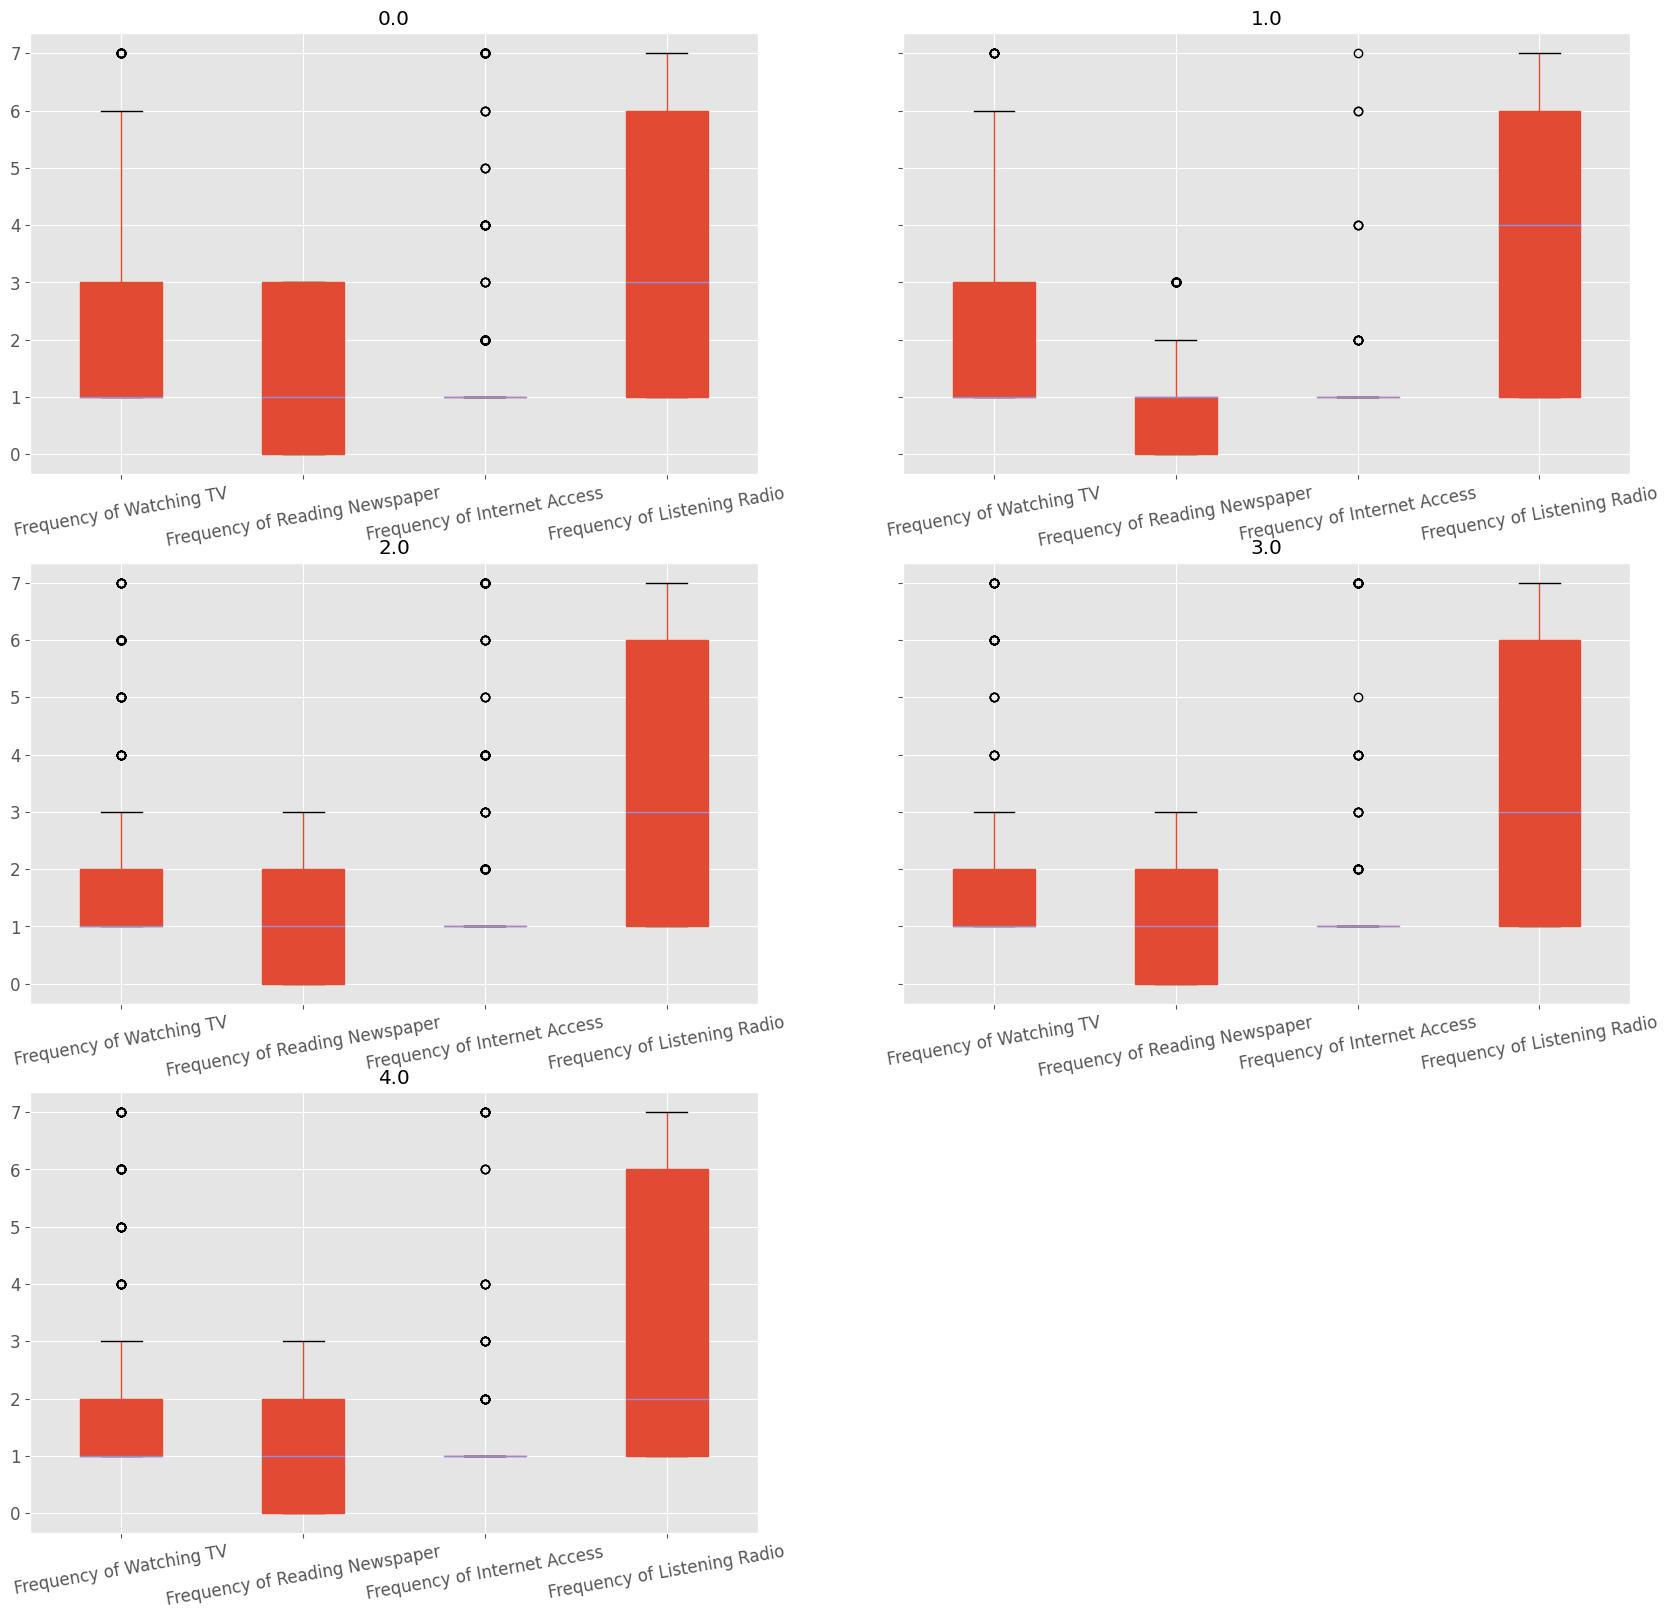

In [ ]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)
plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = (20,20)
mediacluster.groupby(["Clusters"]).boxplot(subplots=True, fontsize=12, column=["Frequency of Watching TV", "Frequency of Reading Newspaper", "Frequency of Internet Access", "Frequency of Listening Radio"], rot=10, patch_artist=True)


In [ ]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [ ]:
# Seems like all clusters listen to the radio very actively 
# No clear trend of internet access usage

In [ ]:
tv = mediacluster.groupby(["Clusters"]).mean()["Frequency of Watching TV"]
newspaper = mediacluster.groupby(["Clusters"]).mean()["Frequency of Reading Newspaper"]
internet = mediacluster.groupby(["Clusters"]).mean()["Frequency of Internet Access"]
radio = mediacluster.groupby(["Clusters"]).mean()["Frequency of Listening Radio"]

Text(0.5, 1.0, 'Radio frequency in each cluster')

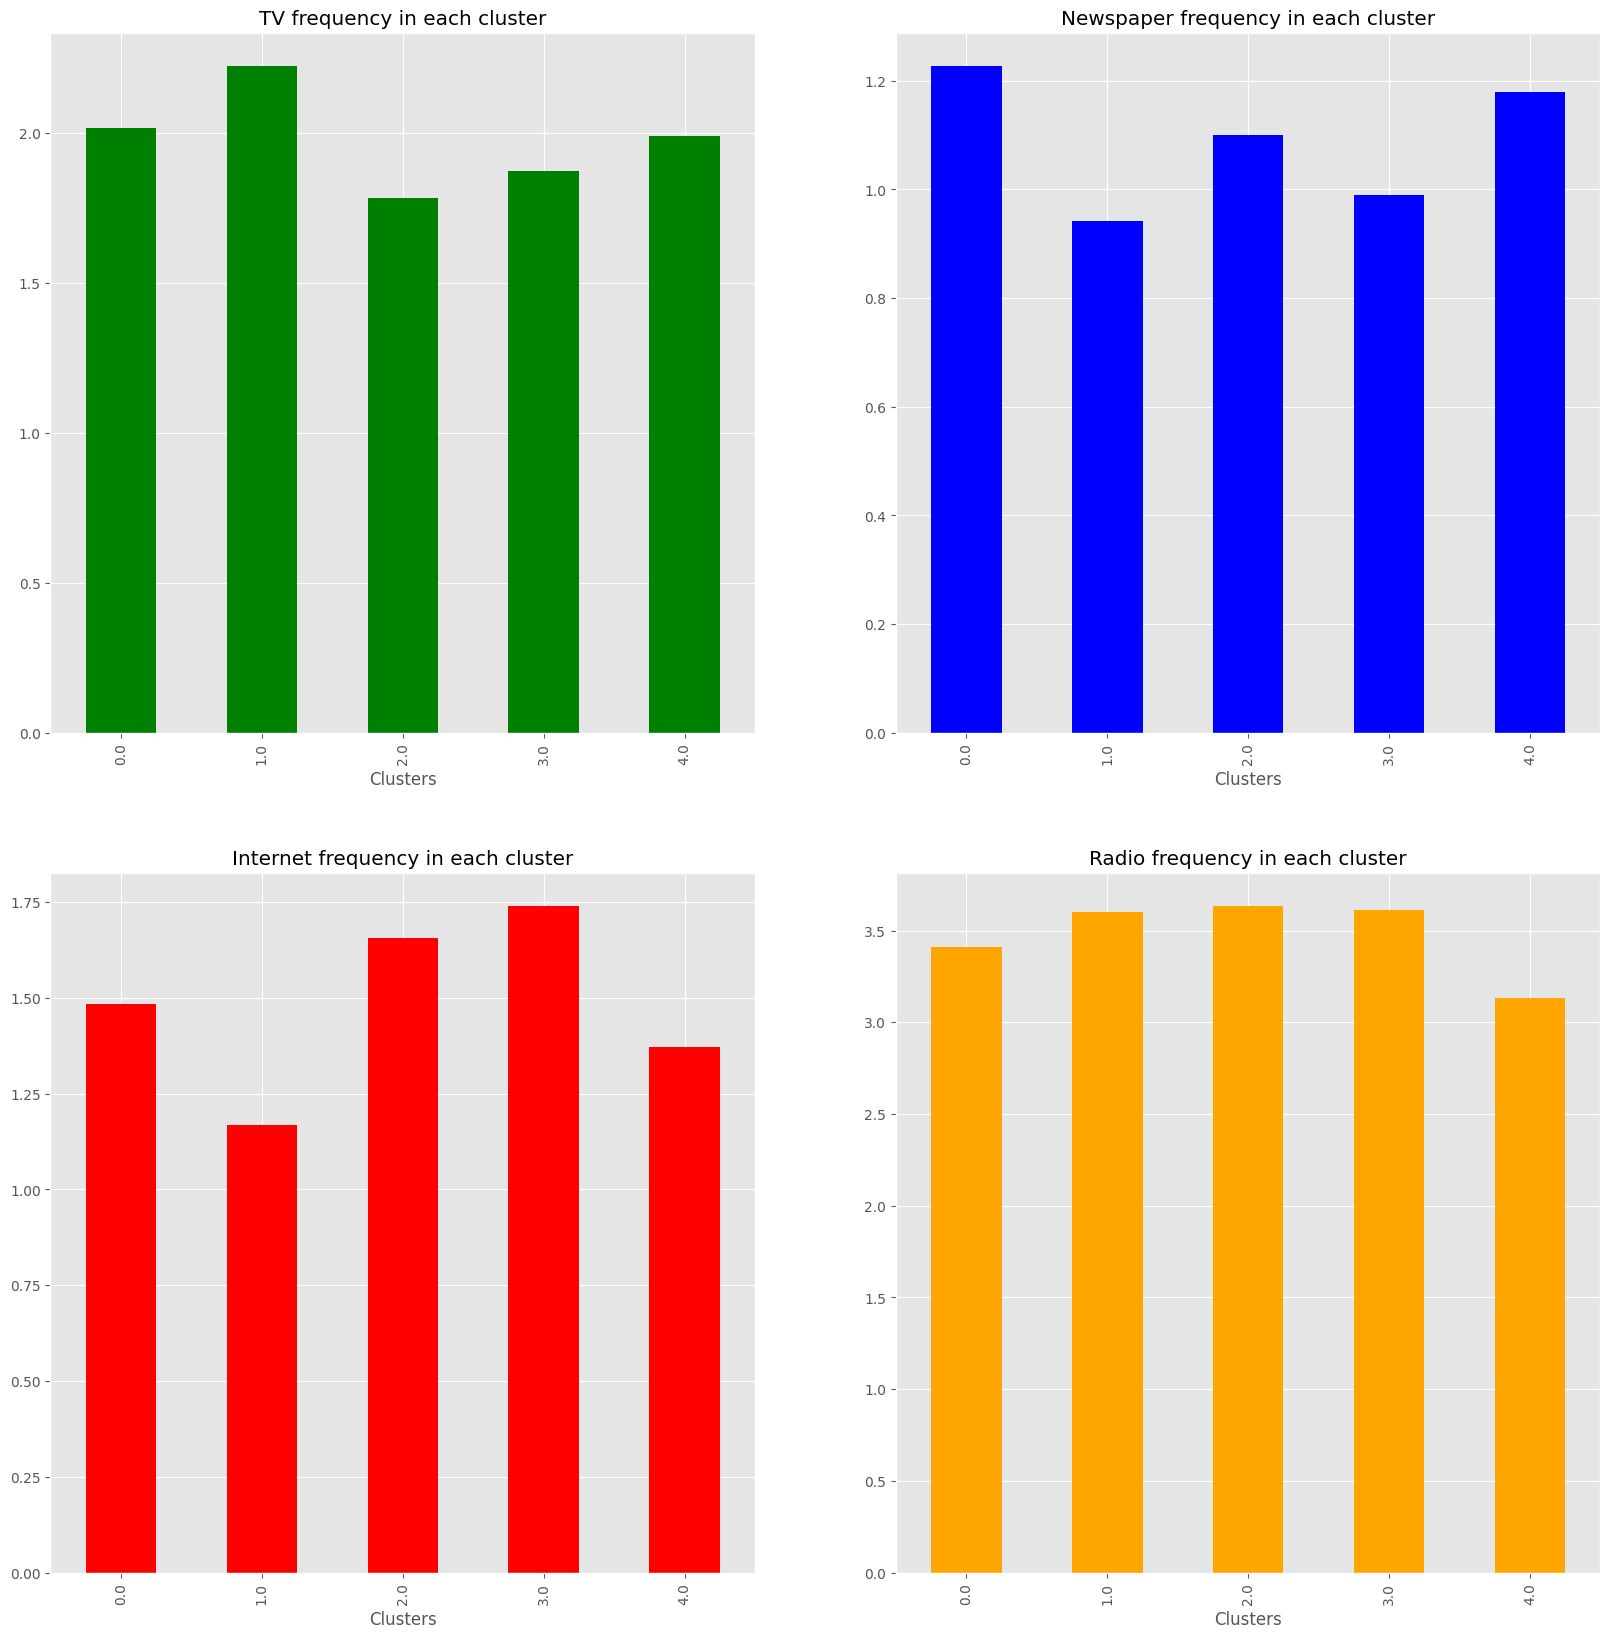

In [ ]:
fig, axs = plt.subplots(2, 2)
plt.rcParams["figure.figsize"] = (12,12)
tv.plot.bar(ax=axs[0,0], by="Clusters", color="green")
axs[0,0].set_title('TV frequency in each cluster')
newspaper.plot.bar(ax=axs[0,1], by="Clusters", color="blue")
axs[0,1].set_title('Newspaper frequency in each cluster')
internet.plot.bar(ax=axs[1,0], by="Clusters", color="red")
axs[1,0].set_title('Internet frequency in each cluster')
radio.plot.bar(ax=axs[1,1], by="Clusters", color="orange")
axs[1,1].set_title('Radio frequency in each cluster')


In [ ]:
phone= mediacluster.groupby(["Clusters"]).mean()["Phone or no"]
internetaccess= mediacluster.groupby(["Clusters"]).mean()["Internet Access at Home"]
mobiledata= mediacluster.groupby(["Clusters"]).mean()["mobileData"]

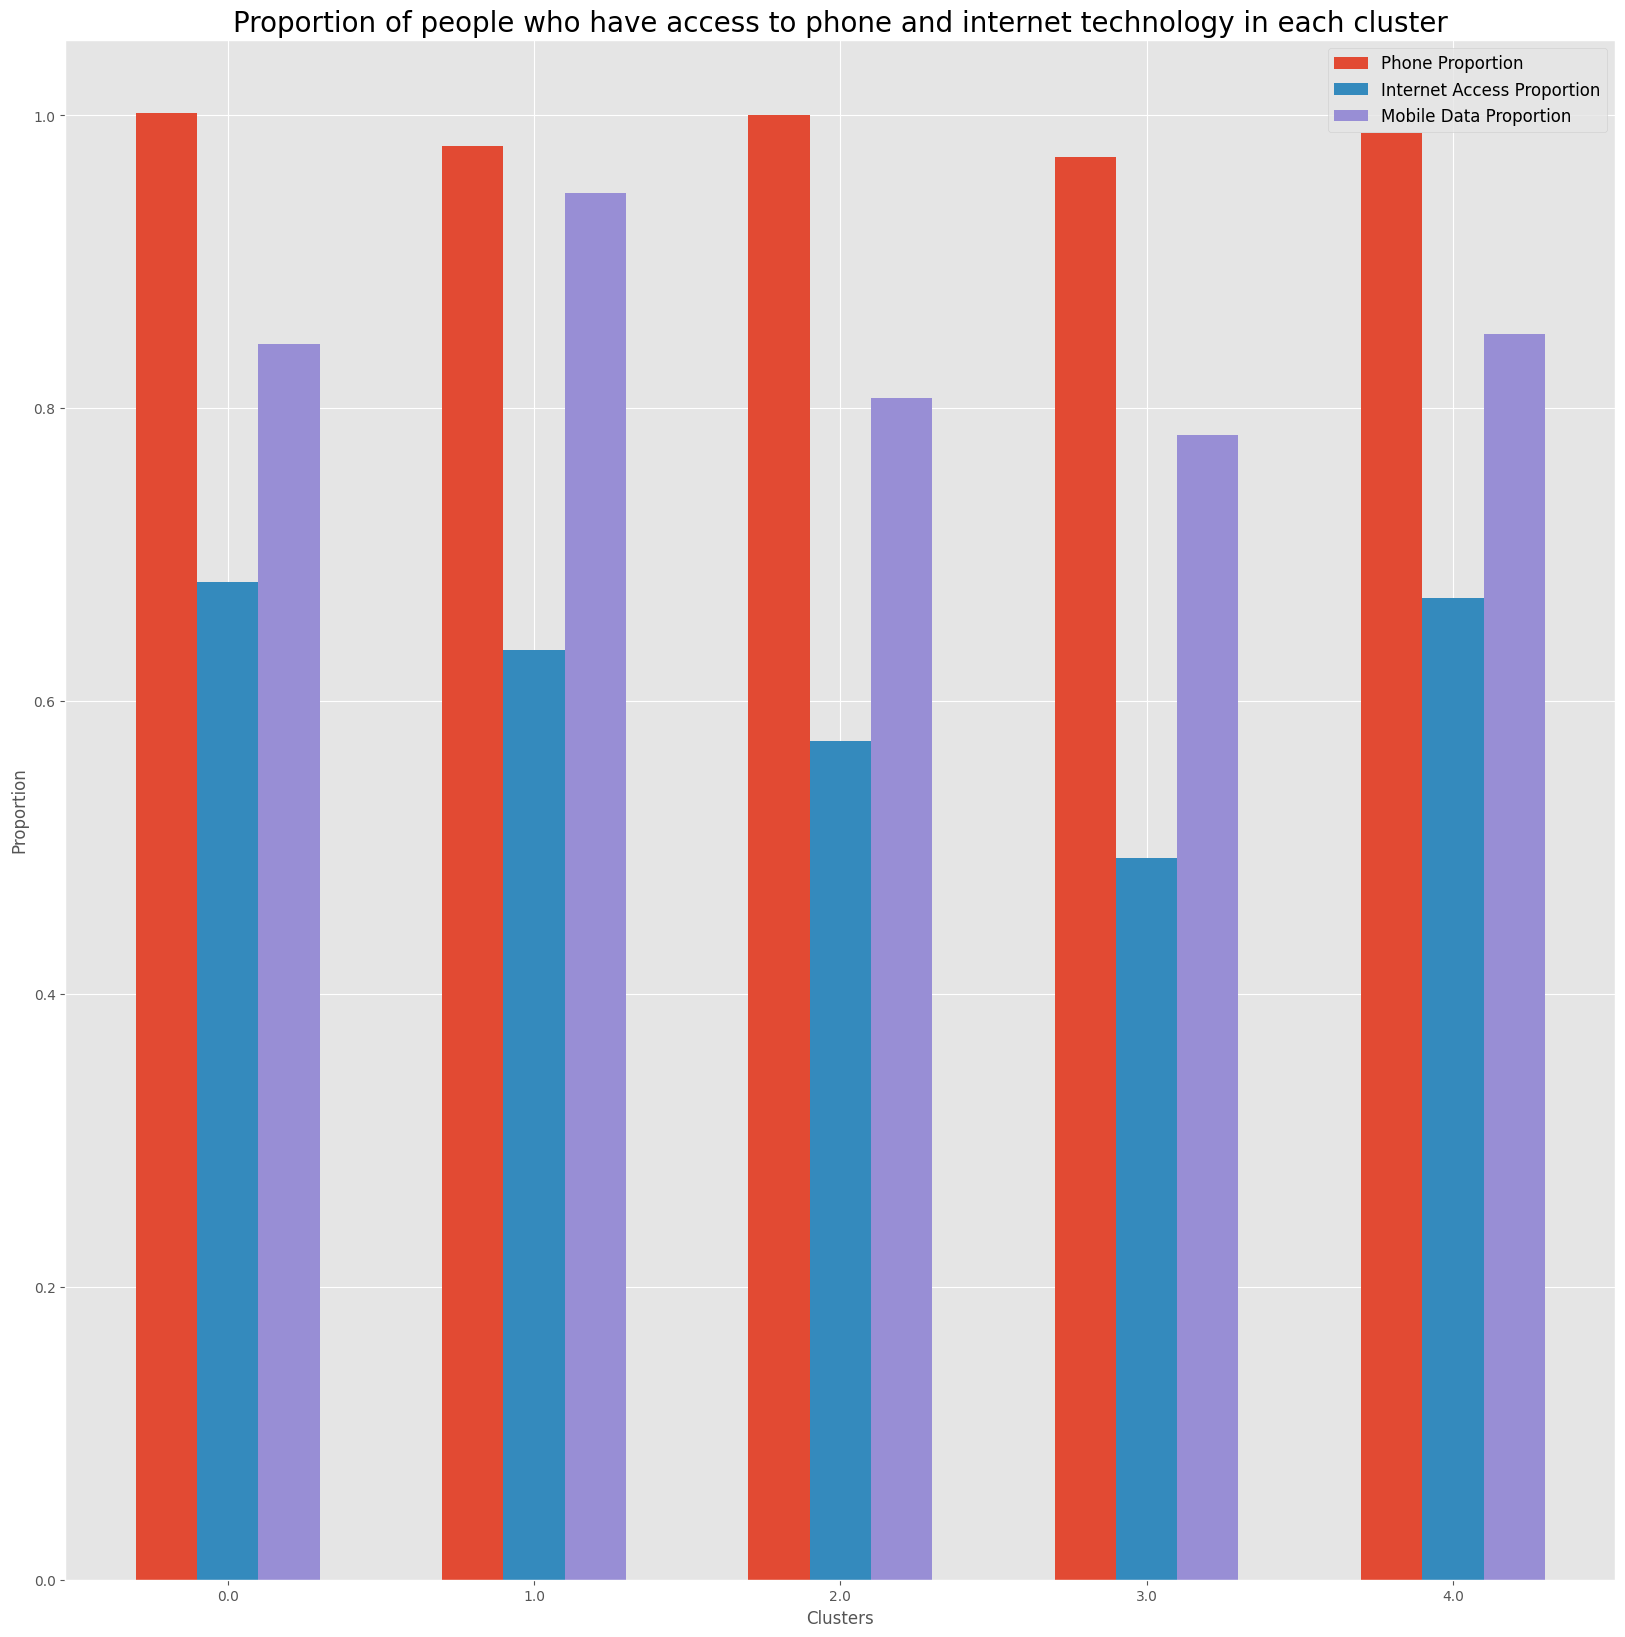

In [ ]:
X = phone.keys()
phoney=phone.values
internetaccessy=internetaccess.values
mobiledatay=mobiledata.values

X_axis = np.arange(5)
  
plt.rcParams["figure.figsize"] = (20,20)
plt.bar(X_axis - 0.2, phoney, 0.2, label = "Phone Proportion")
plt.bar(X_axis, internetaccessy, 0.2, label = "Internet Access Proportion")
plt.bar(X_axis + 0.2, mobiledatay, 0.2, label = "Mobile Data Proportion")
  
plt.xticks(X_axis, X)
plt.xlabel("Clusters")
plt.ylabel("Proportion")
plt.title("Proportion of people who have access to phone and internet technology in each cluster", fontsize=20)
plt.legend(fontsize=12)
plt.show()


# Most have a phone
# Phone > Mobile Data > Internet Access at Home 
# Cluster 2 and 3 have less for all 3 accesses
# Each of the three features seem to have the same pattern with each other

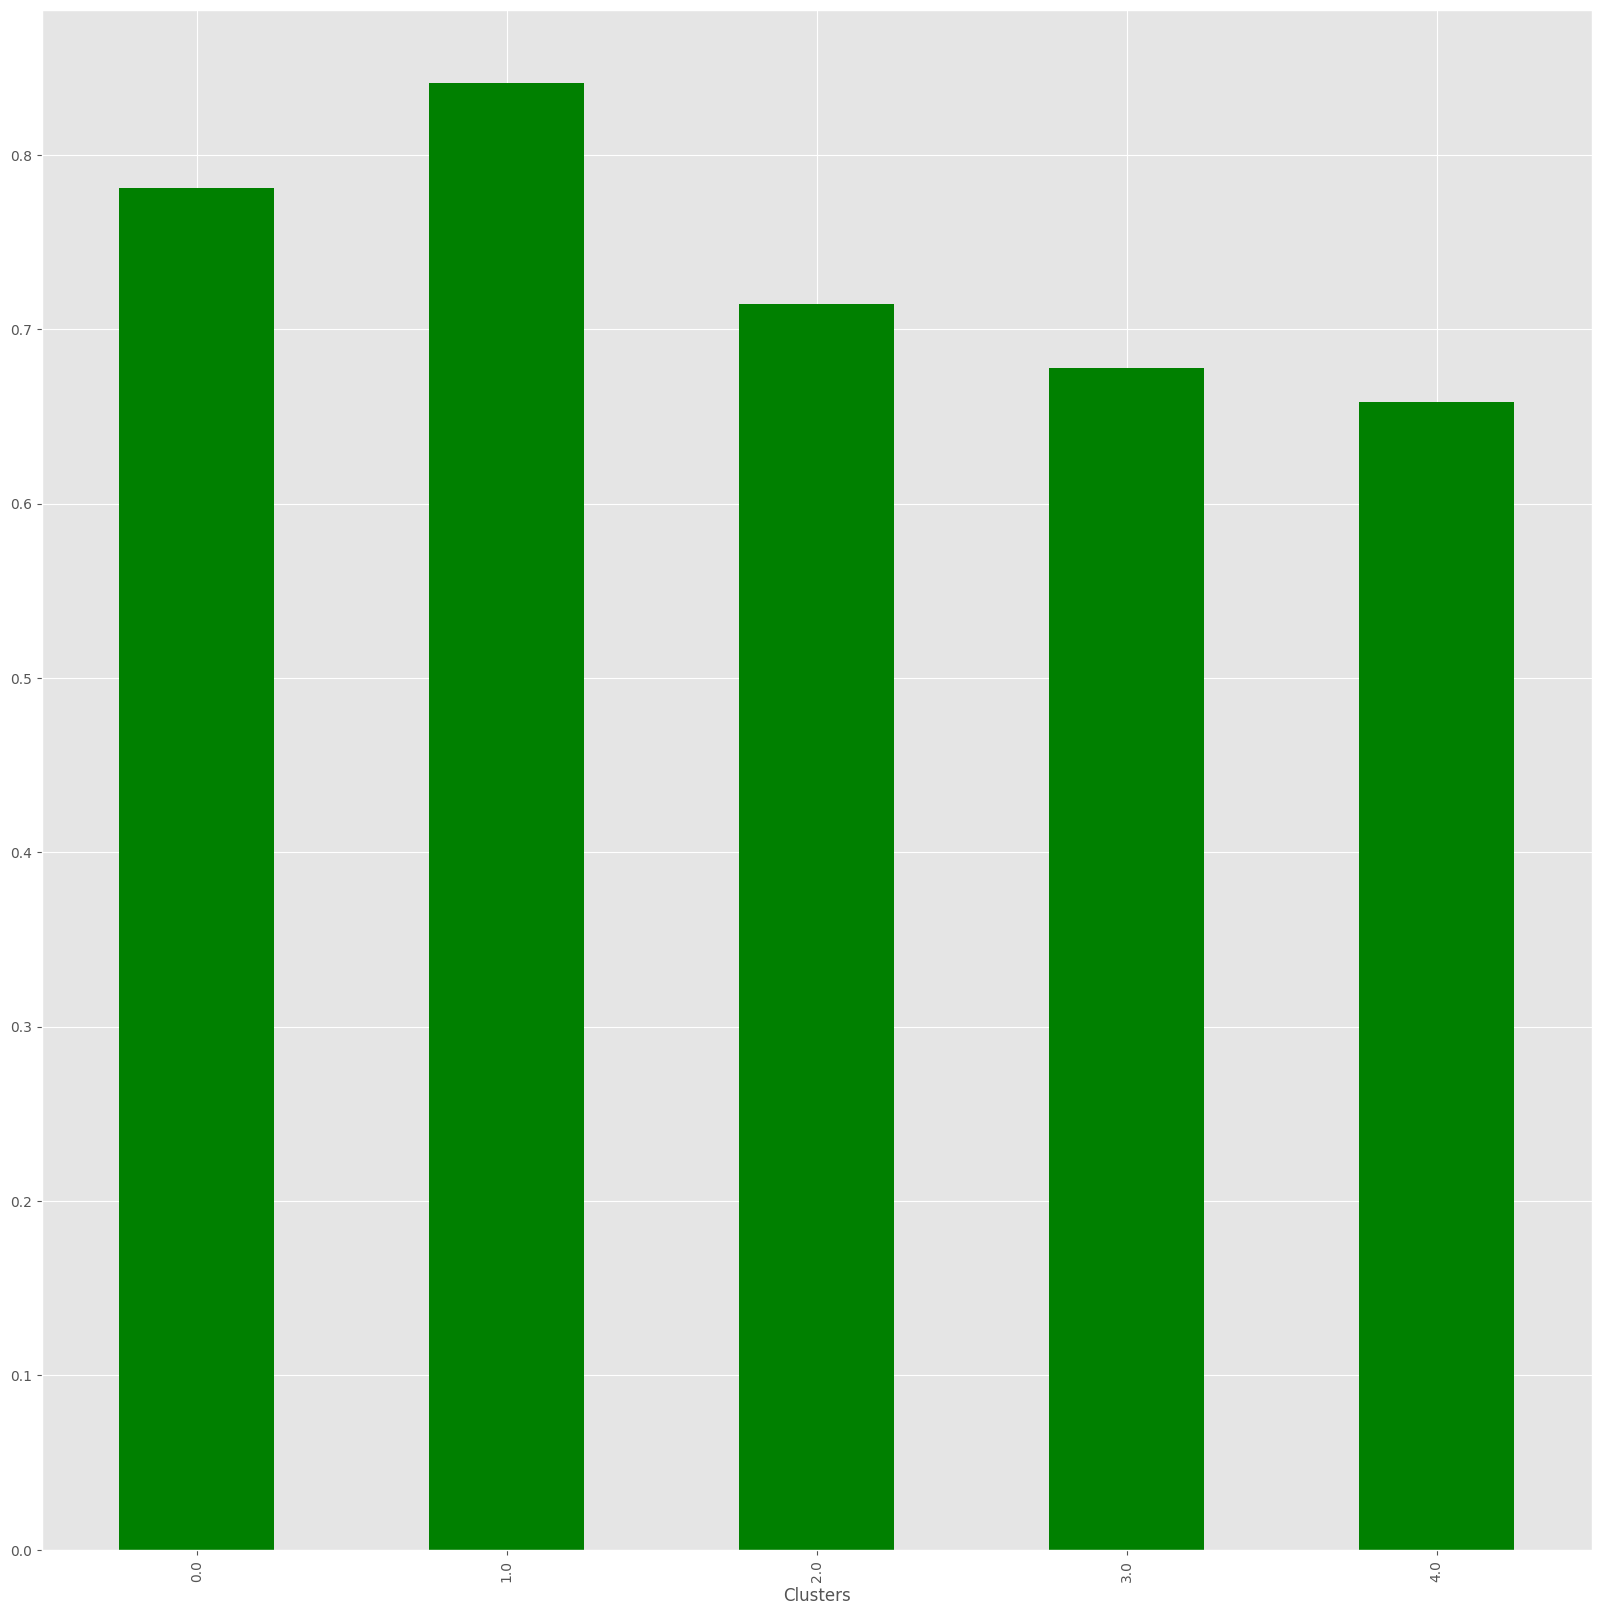

In [ ]:
radiotiming= mediacluster.groupby(["Clusters"]).mean()["Listen to radio at Weekday Morning"]
radiotiming.plot.bar(by="Clusters", color="green")

plt.rcParams["figure.figsize"] = (6,6)
#Cluster 1 top